# Forest Fire Danger Index (FFDI) Calculation Workflow

This notebook contains the complete processing chain for deriving FFDI rasters from meteorological inputs.
Each code block is preceded by a section heading that describes the purpose of the block.

## Section: Calculate Monthly Maximum Temperature Rasters

In [1]:
import os
import re
import numpy as np
import pandas as pd
import rioxarray as riox
import rasterio
from collections import defaultdict

# Folder paths
celsius_folder = "C:/Users/gades/Desktop/Thesis/datasets/Temperature/temp_daily/celsius/celsiusmasked"
output_folder = "C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly"
os.makedirs(output_folder, exist_ok=True)

# Updated regex to extract date from filenames in YYYY-MM-DD format
def extract_date(filename):
    match = re.search(r'(\d{4})-(\d{2})-(\d{2})', filename)
    if match:
        return pd.to_datetime(f"{match.group(1)}-{match.group(2)}-{match.group(3)}")
    return None

# Group files by year-month
file_groups = defaultdict(list)
for file in os.listdir(celsius_folder):
    if file.endswith(".tif"):
        date = extract_date(file)
        print(f"{file} → {date}")  # Debug: see if dates are extracted
        if date:
            ym = date.strftime("%Y-%m")
            file_groups[ym].append((date, file))

print(f"\nTotal months detected: {len(file_groups)}")

# Process each year-month group
for ym, date_file_pairs in sorted(file_groups.items()):
    print(f"\nProcessing {ym} with {len(date_file_pairs)} daily rasters...")
    date_file_pairs.sort()  # Sort by date
    monthly_stack = []

    for _, file in date_file_pairs:
        path = os.path.join(celsius_folder, file)
        ds = riox.open_rasterio(path)
        if ds.rio.crs is None:
            ds = ds.rio.write_crs("EPSG:4326", inplace=True)
        data = ds[0].values
        nodata = ds.rio.nodata
        if nodata is not None:
            data[data == nodata] = np.nan
        monthly_stack.append(data)
        ds.close()

    if not monthly_stack:
        print(f"⚠️ No valid data found for {ym}. Skipping.")
        continue

    # Stack to 3D array and take max along the time axis
    stack = np.stack(monthly_stack, axis=0)
    max_data = np.nanmax(stack, axis=0)
    max_data[np.isnan(max_data)] = -9999  # Replace NaN with nodata

    # Save the result
    first_file = os.path.join(celsius_folder, date_file_pairs[0][1])
    ref_ds = riox.open_rasterio(first_file)
    output_path = os.path.join(output_folder, f"tmax_{ym}.tif")

    with rasterio.open(
        output_path, "w",
        driver="GTiff",
        height=max_data.shape[0],
        width=max_data.shape[1],
        count=1,
        dtype="float32",
        crs=ref_ds.rio.crs,
        transform=ref_ds.rio.transform(),
        nodata=-9999
    ) as dst:
        dst.write(max_data.astype(np.float32), 1)

    ref_ds.close()
    print(f"✅ Saved: {output_path}")

print("\n✅ Monthly maximum temperature rasters created.")

t2m_dailymax_2019-01-01_cel.tif → 2019-01-01 00:00:00
t2m_dailymax_2019-01-02_cel.tif → 2019-01-02 00:00:00
t2m_dailymax_2019-01-03_cel.tif → 2019-01-03 00:00:00
t2m_dailymax_2019-01-04_cel.tif → 2019-01-04 00:00:00
t2m_dailymax_2019-01-05_cel.tif → 2019-01-05 00:00:00
t2m_dailymax_2019-01-06_cel.tif → 2019-01-06 00:00:00
t2m_dailymax_2019-01-07_cel.tif → 2019-01-07 00:00:00
t2m_dailymax_2019-01-08_cel.tif → 2019-01-08 00:00:00
t2m_dailymax_2019-01-09_cel.tif → 2019-01-09 00:00:00
t2m_dailymax_2019-01-10_cel.tif → 2019-01-10 00:00:00
t2m_dailymax_2019-01-11_cel.tif → 2019-01-11 00:00:00
t2m_dailymax_2019-01-12_cel.tif → 2019-01-12 00:00:00
t2m_dailymax_2019-01-13_cel.tif → 2019-01-13 00:00:00
t2m_dailymax_2019-01-14_cel.tif → 2019-01-14 00:00:00
t2m_dailymax_2019-01-15_cel.tif → 2019-01-15 00:00:00
t2m_dailymax_2019-01-16_cel.tif → 2019-01-16 00:00:00
t2m_dailymax_2019-01-17_cel.tif → 2019-01-17 00:00:00
t2m_dailymax_2019-01-18_cel.tif → 2019-01-18 00:00:00
t2m_dailymax_2019-01-19_cel.

C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2013-01.tif

Processing 2013-02 with 28 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2013-02.tif

Processing 2013-03 with 31 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2013-03.tif

Processing 2013-04 with 30 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2013-04.tif

Processing 2013-05 with 31 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2013-05.tif

Processing 2013-06 with 30 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2013-06.tif

Processing 2013-07 with 31 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2013-07.tif

Processing 2013-08 with 31 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2013-08.tif

Processing 2013-09 with 30 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2013-09.tif

Processing 2013-10 with 31 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2013-10.tif

Processing 2013-11 with 30 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2013-11.tif

Processing 2013-12 with 31 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2013-12.tif

Processing 2014-01 with 31 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2014-01.tif

Processing 2014-02 with 28 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2014-02.tif

Processing 2014-03 with 31 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2014-03.tif

Processing 2014-04 with 30 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2014-04.tif

Processing 2014-05 with 31 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2014-05.tif

Processing 2014-06 with 30 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2014-06.tif

Processing 2014-07 with 31 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2014-07.tif

Processing 2014-08 with 31 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2014-08.tif

Processing 2014-09 with 30 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2014-09.tif

Processing 2014-10 with 31 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2014-10.tif

Processing 2014-11 with 30 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2014-11.tif

Processing 2014-12 with 31 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2014-12.tif

Processing 2015-01 with 31 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2015-01.tif

Processing 2015-02 with 28 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2015-02.tif

Processing 2015-03 with 31 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2015-03.tif

Processing 2015-04 with 30 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2015-04.tif

Processing 2015-05 with 31 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2015-05.tif

Processing 2015-06 with 30 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2015-06.tif

Processing 2015-07 with 31 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2015-07.tif

Processing 2015-08 with 31 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2015-08.tif

Processing 2015-09 with 30 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2015-09.tif

Processing 2015-10 with 31 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2015-10.tif

Processing 2015-11 with 30 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2015-11.tif

Processing 2015-12 with 31 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2015-12.tif

Processing 2016-01 with 31 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2016-01.tif

Processing 2016-02 with 29 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2016-02.tif

Processing 2016-03 with 31 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2016-03.tif

Processing 2016-04 with 30 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2016-04.tif

Processing 2016-05 with 31 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2016-05.tif

Processing 2016-06 with 30 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2016-06.tif

Processing 2016-07 with 31 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2016-07.tif

Processing 2016-08 with 31 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2016-08.tif

Processing 2016-09 with 30 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2016-09.tif

Processing 2016-10 with 31 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2016-10.tif

Processing 2016-11 with 30 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2016-11.tif

Processing 2016-12 with 31 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2016-12.tif

Processing 2017-01 with 31 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2017-01.tif

Processing 2017-02 with 28 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2017-02.tif

Processing 2017-03 with 31 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2017-03.tif

Processing 2017-04 with 30 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2017-04.tif

Processing 2017-05 with 31 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2017-05.tif

Processing 2017-06 with 30 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2017-06.tif

Processing 2017-07 with 31 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2017-07.tif

Processing 2017-08 with 31 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2017-08.tif

Processing 2017-09 with 30 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2017-09.tif

Processing 2017-10 with 31 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2017-10.tif

Processing 2017-11 with 30 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2017-11.tif

Processing 2017-12 with 31 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2017-12.tif

Processing 2018-01 with 31 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2018-01.tif

Processing 2018-02 with 28 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2018-02.tif

Processing 2018-03 with 31 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2018-03.tif

Processing 2018-04 with 30 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2018-04.tif

Processing 2018-05 with 31 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2018-05.tif

Processing 2018-06 with 30 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2018-06.tif

Processing 2018-07 with 31 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2018-07.tif

Processing 2018-08 with 31 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2018-08.tif

Processing 2018-09 with 30 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2018-09.tif

Processing 2018-10 with 31 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2018-10.tif

Processing 2018-11 with 30 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2018-11.tif

Processing 2018-12 with 31 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2018-12.tif

Processing 2019-01 with 31 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2019-01.tif

Processing 2019-02 with 28 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2019-02.tif

Processing 2019-03 with 31 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2019-03.tif

Processing 2019-04 with 30 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2019-04.tif

Processing 2019-05 with 31 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2019-05.tif

Processing 2019-06 with 30 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2019-06.tif

Processing 2019-07 with 31 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2019-07.tif

Processing 2019-08 with 31 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2019-08.tif

Processing 2019-09 with 30 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2019-09.tif

Processing 2019-10 with 31 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2019-10.tif

Processing 2019-11 with 30 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2019-11.tif

Processing 2019-12 with 31 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2019-12.tif

Processing 2020-01 with 31 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2020-01.tif

Processing 2020-02 with 29 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2020-02.tif

Processing 2020-03 with 31 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2020-03.tif

Processing 2020-04 with 30 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2020-04.tif

Processing 2020-05 with 31 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2020-05.tif

Processing 2020-06 with 30 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2020-06.tif

Processing 2020-07 with 31 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2020-07.tif

Processing 2020-08 with 31 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2020-08.tif

Processing 2020-09 with 30 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2020-09.tif

Processing 2020-10 with 31 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2020-10.tif

Processing 2020-11 with 30 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2020-11.tif

Processing 2020-12 with 31 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2020-12.tif

Processing 2021-01 with 31 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2021-01.tif

Processing 2021-02 with 28 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2021-02.tif

Processing 2021-03 with 31 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2021-03.tif

Processing 2021-04 with 30 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2021-04.tif

Processing 2021-05 with 31 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2021-05.tif

Processing 2021-06 with 30 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2021-06.tif

Processing 2021-07 with 31 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2021-07.tif

Processing 2021-08 with 31 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2021-08.tif

Processing 2021-09 with 30 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2021-09.tif

Processing 2021-10 with 31 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2021-10.tif

Processing 2021-11 with 30 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2021-11.tif

Processing 2021-12 with 31 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2021-12.tif

Processing 2022-01 with 31 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2022-01.tif

Processing 2022-02 with 28 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2022-02.tif

Processing 2022-03 with 31 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2022-03.tif

Processing 2022-04 with 30 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2022-04.tif

Processing 2022-05 with 31 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2022-05.tif

Processing 2022-06 with 30 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2022-06.tif

Processing 2022-07 with 31 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2022-07.tif

Processing 2022-08 with 31 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2022-08.tif

Processing 2022-09 with 30 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2022-09.tif

Processing 2022-10 with 31 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2022-10.tif

Processing 2022-11 with 30 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2022-11.tif

Processing 2022-12 with 31 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2022-12.tif

Processing 2023-01 with 31 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2023-01.tif

Processing 2023-02 with 28 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2023-02.tif

Processing 2023-03 with 31 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2023-03.tif

Processing 2023-04 with 30 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2023-04.tif

Processing 2023-05 with 31 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2023-05.tif

Processing 2023-06 with 30 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2023-06.tif

Processing 2023-07 with 31 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2023-07.tif

Processing 2023-08 with 31 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2023-08.tif

Processing 2023-09 with 30 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2023-09.tif

Processing 2023-10 with 31 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2023-10.tif

Processing 2023-11 with 30 daily rasters...


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2023-11.tif

Processing 2023-12 with 31 daily rasters...
✅ Saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly\tmax_2023-12.tif

✅ Monthly maximum temperature rasters created.


C:\Users\gades\AppData\Local\Temp\ipykernel_9756\3225099397.py:57: RuntimeWarning: All-NaN slice encountered
  max_data = np.nanmax(stack, axis=0)


## Section: Compute Monthly Drought Factor Percentiles (p80, p90, Max, Min)

In [ ]:
import rasterio
import numpy as np
import glob
import os
from datetime import datetime

# Directory containing daily tif files
input_folder = "C:/Users/gades/Desktop/Thesis/datasets/PRECPITATION_MERGED/precipitation_daily/df_final"
output_folder ="C:/Users/gades/Desktop/Thesis/datasets/PRECPITATION_MERGED/precipitation_daily/DF_monthly"

# Define metrics to calculate
metrics = {
    'p80': lambda x: np.nanpercentile(x, 80, axis=0),
    'p90': lambda x: np.nanpercentile(x, 90, axis=0),
    'max': lambda x: np.nanmax(x, axis=0),
    'min': lambda x: np.nanmin(x, axis=0)
}

# Create output directories
for metric in metrics:
    os.makedirs(os.path.join(output_folder, metric), exist_ok=True)

# Get all daily tif files
all_files = sorted(glob.glob(os.path.join(input_folder, '*.tif')))

# Organize files by year and month
file_dict = {}
for f in all_files:
    filename = os.path.basename(f)
    date_str = filename.split('_')[-2]  # Extract date "YYYY-MM-DD"
    date = datetime.strptime(date_str, '%Y-%m-%d')
    year_month = date.strftime('%Y_%m')
    if year_month not in file_dict:
        file_dict[year_month] = []
    file_dict[year_month].append(f)

# Process each month
for year_month, files in file_dict.items():
    monthly_stack = []
    profile = None

    for file in files:
        with rasterio.open(file) as src:
            if profile is None:
                profile = src.profile
            data = src.read(1)
            data = np.where(data == profile['nodata'], np.nan, data)
            monthly_stack.append(data)

    monthly_stack = np.array(monthly_stack)

    for metric_name, metric_func in metrics.items():
        result = metric_func(monthly_stack)
        result = np.where(np.isnan(result), profile['nodata'], result)
        result = result.astype(profile['dtype'])

        profile.update(count=1, compress='lzw')

        output_filename = f"{metric_name}_{year_month}.tif"
        output_path = os.path.join(output_folder, metric_name, output_filename)

        with rasterio.open(output_path, 'w', **profile) as dst:
            dst.write(result, 1)

    print(f"Processed month: {year_month}")

print("All monthly drought factor files created successfully.")


## Section: Assign Coordinate Reference System to Vapour Pressure Rasters

In [7]:
import rasterio
from rasterio.crs import CRS
import os

vap_folder = "C:/Users/gades/Desktop/Thesis/datasets/terra_var/vap"
target_crs = CRS.from_epsg(4326)  # WGS84 (replace with your actual CRS if different)

for filename in os.listdir(vap_folder):
    if filename.endswith(".tif"):
        path = os.path.join(vap_folder, filename)
        with rasterio.open(path, 'r+') as ds:
            if ds.crs is None:
                print(f"🛠 Assigning CRS to {filename}")
                ds.crs = target_crs


🛠 Assigning CRS to vap_2013-01.tif
🛠 Assigning CRS to vap_2013-02.tif
🛠 Assigning CRS to vap_2013-03.tif
🛠 Assigning CRS to vap_2013-04.tif
🛠 Assigning CRS to vap_2013-05.tif
🛠 Assigning CRS to vap_2013-06.tif
🛠 Assigning CRS to vap_2013-07.tif
🛠 Assigning CRS to vap_2013-08.tif
🛠 Assigning CRS to vap_2013-09.tif
🛠 Assigning CRS to vap_2013-10.tif
🛠 Assigning CRS to vap_2013-11.tif
🛠 Assigning CRS to vap_2013-12.tif
🛠 Assigning CRS to vap_2014-01.tif
🛠 Assigning CRS to vap_2014-02.tif
🛠 Assigning CRS to vap_2014-03.tif
🛠 Assigning CRS to vap_2014-04.tif
🛠 Assigning CRS to vap_2014-05.tif
🛠 Assigning CRS to vap_2014-06.tif
🛠 Assigning CRS to vap_2014-07.tif
🛠 Assigning CRS to vap_2014-08.tif
🛠 Assigning CRS to vap_2014-09.tif
🛠 Assigning CRS to vap_2014-10.tif
🛠 Assigning CRS to vap_2014-11.tif
🛠 Assigning CRS to vap_2014-12.tif
🛠 Assigning CRS to vap_2015-01.tif
🛠 Assigning CRS to vap_2015-02.tif
🛠 Assigning CRS to vap_2015-03.tif
🛠 Assigning CRS to vap_2015-04.tif
🛠 Assigning CRS to v

## Section: Calculate Daily Relative Humidity Rasters from Temperature and Vapour Pressure

In [12]:
import os
import rasterio
import numpy as np
from rasterio.warp import reproject, Resampling
from rasterio.errors import RasterioIOError

# === Folder paths ===
t_folder = r"C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/tempfiltered"
vap_folder = r"C:/Users/gades/Desktop/Thesis/datasets/terra_var/vap"
rh_folder = r"C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/RH2"
os.makedirs(rh_folder, exist_ok=True)

# === Relative Humidity calculation ===
def compute_rh(temp_c, vap_pa):
    vap_hpa = vap_pa / 100.0  # Convert Pa to hPa
    e_s = 6.112 * np.exp((17.67 * temp_c) / (temp_c + 243.5))  # hPa
    rh = (vap_hpa / e_s) * 100
    return np.clip(rh, 0, 100)  # Constrain RH to [0, 100]%

# === Read raster as array + metadata ===
def read_raster(path):
    with rasterio.open(path) as src:
        arr = src.read(1).astype(np.float32)
        nodata = src.nodata
        arr[arr == nodata] = np.nan
        return arr, src.profile, src.transform, src.crs

# === Resample raster to match target ===
def resample_raster(src_array, src_profile, target_shape, target_transform, target_crs):
    dst_array = np.empty(target_shape, dtype=np.float32)
    reproject(
        source=src_array,
        destination=dst_array,
        src_transform=src_profile['transform'],
        src_crs=src_profile['crs'],
        dst_transform=target_transform,
        dst_crs=target_crs,
        resampling=Resampling.bilinear
    )
    return dst_array

# === Process all raster pairs ===
print("📂 Starting RH generation from temperature and vapor pressure files...\n")
count = 0

for fname in sorted(os.listdir(t_folder)):
    if not fname.endswith('.tif') or '_max' not in fname:
        continue

    date = fname.replace('_max.tif', '')         # '2013_01'
    vap_date = date.replace('_', '-')            # '2013-01'
    t_path = os.path.join(t_folder, fname)
    v_path = os.path.join(vap_folder, f'vap_{vap_date}.tif')
    rh_path = os.path.join(rh_folder, f'rh_{date}.tif')

    if not os.path.exists(v_path):
        print(f"❌ Missing vapor raster: {v_path}")
        continue

    try:
        temp, t_prof, t_trans, t_crs = read_raster(t_path)
        vap, v_prof, v_trans, v_crs = read_raster(v_path)
    except RasterioIOError as e:
        print(f"❌ Error reading raster: {e}")
        continue

    # Resample vapor pressure to match temperature
    if temp.shape != vap.shape or t_trans != v_trans or t_crs != v_crs:
        print(f"🔄 Resampling VAP for date {date}")
        vap = resample_raster(vap, v_prof, temp.shape, t_trans, t_crs)

    # Calculate Relative Humidity
    rh = compute_rh(temp, vap)

    # Prepare output profile
    out_prof = t_prof.copy()
    out_prof.update(dtype=rasterio.float32, nodata=-9999)

    # Replace NaNs for saving
    rh[np.isnan(rh)] = -9999

    # Save to disk
    with rasterio.open(rh_path, 'w', **out_prof) as dst:
        dst.write(rh.astype(np.float32), 1)

    print(f"✅ Saved RH raster: {rh_path}")
    count += 1

print(f"\n🎯 RH raster generation completed. Total created: {count}")


📂 Starting RH generation from temperature and vapor pressure files...

🔄 Resampling VAP for date 2013_01
✅ Saved RH raster: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/RH2\rh_2013_01.tif
🔄 Resampling VAP for date 2013_02
✅ Saved RH raster: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/RH2\rh_2013_02.tif
🔄 Resampling VAP for date 2013_03
✅ Saved RH raster: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/RH2\rh_2013_03.tif
🔄 Resampling VAP for date 2013_04
✅ Saved RH raster: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/RH2\rh_2013_04.tif
🔄 Resampling VAP for date 2013_05
✅ Saved RH raster: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/RH2\rh_2013_05.tif
🔄 Resampling VAP for date 2013_06
✅ Saved RH raster: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/RH2\rh_2013_06.tif
🔄 Resampling VAP for date 2013_07
✅ Saved RH raster: C:/Users/gades/Desktop/Thesis/

## Section: Clean Relative Humidity Rasters (Edge Masking)

In [14]:
import os
import numpy as np
import rasterio
from rasterio.enums import Resampling
from scipy.ndimage import binary_erosion
from pathlib import Path

input_folder = Path("C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/RH2")
output_folder = Path("C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/RH_cleaned")
output_folder.mkdir(parents=True, exist_ok=True)

# === Process each .tif file ===
for tif_path in sorted(input_folder.glob("*.tif")):
    with rasterio.open(tif_path) as src:
        data = src.read(1).astype(np.float32)
        profile = src.profile
        nodata = src.nodata if src.nodata is not None else -9999

        # === Create binary mask of valid (non-nodata) pixels
        mask = data != nodata

        # === Apply binary erosion to shrink mask by 1 pixel
        eroded_mask = binary_erosion(mask, structure=np.ones((3, 3)))

        # === Mask out the eroded edges
        cleaned = np.where(eroded_mask, data, nodata)

        # === Save result
        profile.update(dtype=rasterio.float32, nodata=nodata)
        out_path = output_folder / tif_path.name
        with rasterio.open(out_path, "w", **profile) as dst:
            dst.write(cleaned.astype(np.float32), 1)

        print(f"✅ Trimmed edges: {tif_path.name}")


✅ Trimmed edges: rh_2013_01.tif
✅ Trimmed edges: rh_2013_02.tif
✅ Trimmed edges: rh_2013_03.tif
✅ Trimmed edges: rh_2013_04.tif
✅ Trimmed edges: rh_2013_05.tif
✅ Trimmed edges: rh_2013_06.tif
✅ Trimmed edges: rh_2013_07.tif
✅ Trimmed edges: rh_2013_08.tif
✅ Trimmed edges: rh_2013_09.tif
✅ Trimmed edges: rh_2013_10.tif
✅ Trimmed edges: rh_2013_11.tif
✅ Trimmed edges: rh_2013_12.tif
✅ Trimmed edges: rh_2014_01.tif
✅ Trimmed edges: rh_2014_02.tif
✅ Trimmed edges: rh_2014_03.tif
✅ Trimmed edges: rh_2014_04.tif
✅ Trimmed edges: rh_2014_05.tif
✅ Trimmed edges: rh_2014_06.tif
✅ Trimmed edges: rh_2014_07.tif
✅ Trimmed edges: rh_2014_08.tif
✅ Trimmed edges: rh_2014_09.tif
✅ Trimmed edges: rh_2014_10.tif
✅ Trimmed edges: rh_2014_11.tif
✅ Trimmed edges: rh_2014_12.tif
✅ Trimmed edges: rh_2015_01.tif
✅ Trimmed edges: rh_2015_02.tif
✅ Trimmed edges: rh_2015_03.tif
✅ Trimmed edges: rh_2015_04.tif
✅ Trimmed edges: rh_2015_05.tif
✅ Trimmed edges: rh_2015_06.tif
✅ Trimmed edges: rh_2015_07.tif
✅ Trimme

## Section: Plot Time Series Statistics of Relative Humidity

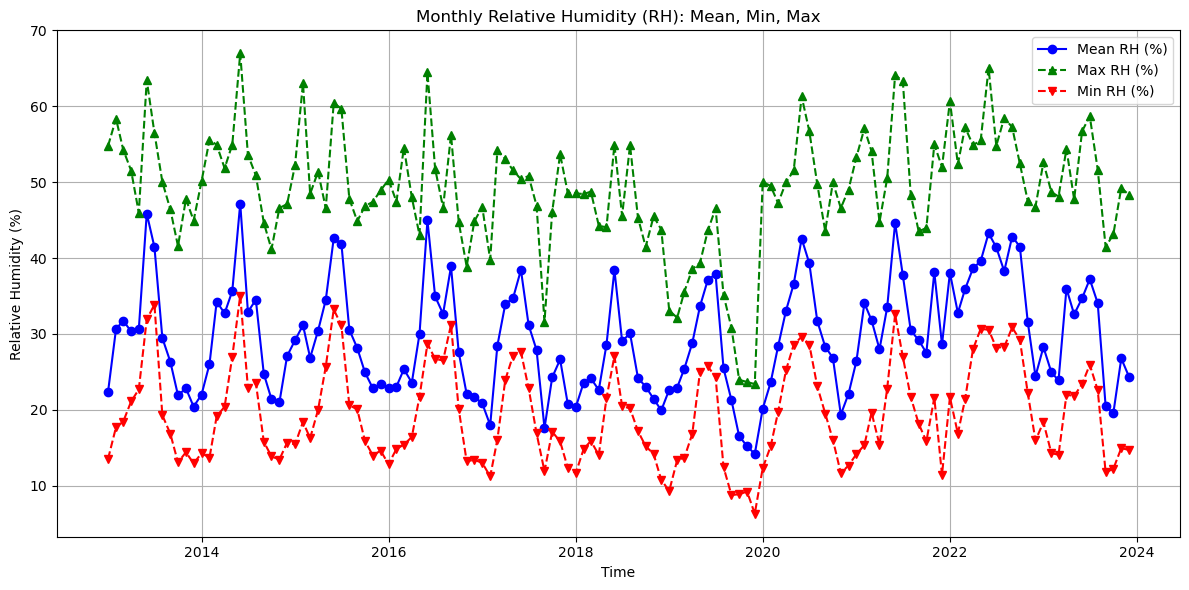

In [1]:
import os
import numpy as np
import rasterio
import matplotlib.pyplot as plt
from datetime import datetime

# Path to your RH rasters folder
rh_folder = r"C:/Users/gades/Desktop/Thesis/datasets/terra_var/relative_humidity"

# Prepare lists for plotting
dates = []
min_rh = []
max_rh = []
mean_rh = []

# Loop through sorted RH rasters
for filename in sorted(os.listdir(rh_folder)):
    if filename.endswith('.tif') and filename.startswith('rh_'):
        date_str = filename.replace('rh_', '').replace('.tif', '')
        date = datetime.strptime(date_str, "%Y-%m")
        dates.append(date)

        rh_path = os.path.join(rh_folder, filename)
        with rasterio.open(rh_path) as src:
            data = src.read(1).astype(np.float32)
            data = np.where(data == src.nodata, np.nan, data)

            min_rh.append(np.nanmin(data))
            max_rh.append(np.nanmax(data))
            mean_rh.append(np.nanmean(data))

# === Plot ===
plt.figure(figsize=(12, 6))
plt.plot(dates, mean_rh, 'bo-', label='Mean RH (%)')
plt.plot(dates, max_rh, 'g^--', label='Max RH (%)')
plt.plot(dates, min_rh, 'rv--', label='Min RH (%)')

plt.title("Monthly Relative Humidity (RH): Mean, Min, Max")
plt.xlabel("Time")
plt.ylabel("Relative Humidity (%)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## Section: Convert Windspeed Rasters from m/s to km/h

In [6]:
import os
import rasterio
import numpy as np

# Input and output folders
input_folder = "C:/Users/gades/Desktop/Thesis/datasets/terra_var/ws"  # Folder containing original windspeed .tif files (in m/s)
output_folder = "C:/Users/gades/Desktop/Thesis/datasets/terra_var/ws_km"# Folder to save converted files (in km/h)
os.makedirs(output_folder, exist_ok=True)

# Loop through all .tif files
for filename in os.listdir(input_folder):
    if filename.endswith('.tif'):
        input_path = os.path.join(input_folder, filename)
        output_path = os.path.join(output_folder, filename)

        with rasterio.open(input_path) as src:
            wind_mps = src.read(1)  # Read wind data (Band 1)
            profile = src.profile  # Get metadata
            nodata = src.nodata

            # Handle nodata values
            wind_mps = np.where(wind_mps == nodata, np.nan, wind_mps)

            # Convert m/s to km/h
            wind_kmph = wind_mps * 3.6

            # Restore nodata if necessary
            if nodata is not None:
                wind_kmph = np.where(np.isnan(wind_kmph), nodata, wind_kmph)

            # Update metadata if needed
            profile.update(dtype=rasterio.float32)

            # Save new raster
            with rasterio.open(output_path, 'w', **profile) as dst:
                dst.write(wind_kmph.astype(rasterio.float32), 1)

print("✅ All windspeed rasters converted from m/s to km/h.")


✅ All windspeed rasters converted from m/s to km/h.


## Section: Resample Windspeed Rasters to Match Relative Humidity Grid

In [ ]:
import rasterio
from rasterio.warp import reproject, Resampling
import numpy as np
import os

# Paths
ws_folder ="C:/Users/gades/Desktop/Thesis/datasets/terra_var/ws_kmph"        # 4 km windspeed tifs
ref_folder ="C:/Users/gades/Desktop/Thesis/datasets/terra_var/relative_humidity"   # Reference 5 km resolution (e.g., RH tif)
out_folder = "C:/Users/gades/Desktop/Thesis/datasets/terra_var/ws_kmph_ds"
os.makedirs(out_folder, exist_ok=True)

ref_sample_tif = os.path.join(ref_folder, "rh_2013-01.tif")  # any reference file

# Read reference shape/profile
with rasterio.open(ref_sample_tif) as ref:
    ref_shape = ref.shape
    ref_transform = ref.transform
    ref_crs = ref.crs
    ref_profile = ref.profile

# Resample each windspeed tif
for fname in os.listdir(ws_folder):
    if fname.endswith(".tif"):
        src_path = os.path.join(ws_folder, fname)
        dst_path = os.path.join(out_folder, fname)

        with rasterio.open(src_path) as src:
            ws_data = src.read(1)
            ws_data = np.where(ws_data == src.nodata, np.nan, ws_data)
            src_transform = src.transform
            src_crs = src.crs

            dst_data = np.empty(ref_shape, dtype=np.float32)

            reproject(
                source=ws_data,
                destination=dst_data,
                src_transform=src_transform,
                src_crs=src_crs,
                dst_transform=ref_transform,
                dst_crs=ref_crs,
                resampling=Resampling.bilinear
            )

        ref_profile.update(dtype=rasterio.float32, nodata=np.nan)

        with rasterio.open(dst_path, 'w', **ref_profile) as dst:
            dst.write(dst_data, 1)

        print(f"✅ Resampled: {fname}")


## Section: Clip Windspeed Rasters to Study Area Boundary

In [ ]:
import os
import rasterio
from rasterio.warp import reproject, Resampling
from rasterio.mask import mask
import numpy as np
import geopandas as gpd
from shapely.geometry import mapping

# === Paths ===
ws_folder = r"C:/Users/gades/Desktop/Thesis/datasets/terra_var/ws_kmph_ds"
rh_file = r"C:/Users/gades/Desktop/Thesis/datasets/terra_var/relative_humidity/rh_2019-01.tif"
shapefile = r"C:/Users/gades/Desktop/Thesis/datasets/STUDYAREA/STUDYAREA.shp"
out_folder = r"C:/Users/gades/Desktop/Thesis/datasets/terra_var/ws_kmph_clipped"
os.makedirs(out_folder, exist_ok=True)

# === Read reference RH for profile ===
with rasterio.open(rh_file) as ref:
    ref_shape = ref.shape
    ref_transform = ref.transform
    ref_crs = ref.crs
    ref_profile = ref.profile

# === Read shapefile for mask ===
shapes = gpd.read_file(shapefile)
shapes = shapes.to_crs(ref_crs)
geom = [mapping(geom) for geom in shapes.geometry]

# === Process each windspeed tif ===
for fname in os.listdir(ws_folder):
    if fname.endswith(".tif"):
        src_path = os.path.join(ws_folder, fname)
        dst_path = os.path.join(out_folder, fname)

        with rasterio.open(src_path) as src:
            data = src.read(1)
            data = np.where(data == src.nodata, np.nan, data)

            # Prepare destination aligned to RH
            dst_data = np.empty(ref_shape, dtype=np.float32)
            reproject(
                source=data,
                destination=dst_data,
                src_transform=src.transform,
                src_crs=src.crs,
                dst_transform=ref_transform,
                dst_crs=ref_crs,
                resampling=Resampling.bilinear
            )

        # Save temporarily before clipping
        temp_path = os.path.join(out_folder, "temp.tif")
        profile = ref_profile.copy()
        profile.update(dtype='float32', nodata=np.nan)
        with rasterio.open(temp_path, 'w', **profile) as tmp:a
            tmp.write(dst_data, 1)

        # Clip to shapefile (like RH)
        with rasterio.open(temp_path) as tmp:
            clipped, clipped_transform = mask(tmp, geom, crop=False, filled=True, nodata=np.nan)

            profile.update({
                "height": clipped.shape[1],
                "width": clipped.shape[2],
                "transform": clipped_transform
            })

            with rasterio.open(dst_path, 'w', **profile) as out_dst:
                out_dst.write(clipped)

        os.remove(temp_path)
        print(f"✅ Clipped & aligned: {fname}")


## Section: Compute Daily FFDI Rasters (McArthur Formula)

In [23]:
import os
import numpy as np
import rasterio
from rasterio.warp import reproject, Resampling

# === Folder paths ===
temp_dir = r"C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/tempfiltered_trimmed"
rh_dir   = r"C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/RH_cleaned"
ws_dir   = r"C:/Users/gades/Desktop/Thesis/datasets/terra_var/ws_kmph_clipped"
df_dir   = r"C:/Users/gades/Desktop/Thesis/datasets/PRECPITATION_MERGED/precipitation_daily/DF_monthly/p90"
ffdi_dir = r"C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI"
os.makedirs(ffdi_dir, exist_ok=True)

def resample_to_match(source_path, target_profile, target_crs):
    with rasterio.open(source_path) as src:
        data = src.read(1).astype(np.float32)
        resampled = np.empty((target_profile['height'], target_profile['width']), dtype=np.float32)
        reproject(
            source=data,
            destination=resampled,
            src_transform=src.transform,
            src_crs=src.crs or target_crs,
            dst_transform=target_profile['transform'],
            dst_crs=target_crs,
            resampling=Resampling.bilinear
        )
        return resampled

for filename in sorted(os.listdir(temp_dir)):
    if not filename.endswith(".tif"):
        continue

    base = filename.replace(".tif", "").replace("_max", "")
    year, month = base.split("_")
    date_dash = f"{year}-{month}"
    date_underscore = f"{year}_{month}"

    temp_path = os.path.join(temp_dir, filename)
    rh_path   = os.path.join(rh_dir, f"rh_{date_underscore}.tif")
    ws_path   = os.path.join(ws_dir, f"ws_{date_dash}.tif")
    df_path   = os.path.join(df_dir, f"p90_{date_underscore}.tif")
    ffdi_path = os.path.join(ffdi_dir, f"ffdi_{date_dash}.tif")

    if not (os.path.exists(temp_path) and os.path.exists(rh_path) and os.path.exists(ws_path) and os.path.exists(df_path)):
        print(f"⚠️ Skipping {date_dash}: One or more input files missing.")
        continue

    try:
        with rasterio.open(temp_path) as temp_src:
            T = temp_src.read(1).astype(np.float32)
            profile = temp_src.profile
            nodata = temp_src.nodata if temp_src.nodata is not None else -9999
            temp_crs = temp_src.crs

        RH = resample_to_match(rh_path, profile, temp_crs)
        WS = resample_to_match(ws_path, profile, temp_crs)
        DF = resample_to_match(df_path, profile, temp_crs)

        mask = np.isnan(T) | np.isnan(RH) | np.isnan(WS) | np.isnan(DF)

        DF = np.clip(DF, 0.01, 10)
        if RH.max() <= 1.0:
            RH = RH * 100

        ln_DF = np.log(DF)

        FFDI = 2 * np.exp(
            -0.45 +
            0.98 * ln_DF -
            0.0345 * RH +
            0.0338 * T +
            0.0234 * WS
        )

        FFDI[mask] = nodata
        FFDI = np.clip(FFDI, 0, 100)

        profile.update(dtype=rasterio.float32, nodata=nodata)

        with rasterio.open(ffdi_path, 'w', **profile) as dst:
            dst.write(FFDI.astype(np.float32), 1)

        print(f"✅ FFDI saved: {ffdi_path}")

    except Exception as e:
        print(f"❌ Error processing {date_dash}: {e}")

print("🏁 All FFDI files processed.")


C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(
C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(
C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(


✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2013-01.tif
✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2013-02.tif
✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2013-03.tif
✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2013-04.tif


C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(
C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(
C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(


✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2013-05.tif
✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2013-06.tif
✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2013-07.tif


C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(
C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(
C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(


✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2013-08.tif
✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2013-09.tif


C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(
C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(


✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2013-10.tif
✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2013-11.tif


C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(
C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(


✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2013-12.tif
✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2014-01.tif


C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(
C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(


✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2014-02.tif
✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2014-03.tif


C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(
C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(


✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2014-04.tif
✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2014-05.tif


C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(
C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(
C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(


✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2014-06.tif
✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2014-07.tif
✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2014-08.tif


C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(
C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(
C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(


✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2014-09.tif
✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2014-10.tif
✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2014-11.tif


C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(
C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(
C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(


✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2014-12.tif
✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2015-01.tif
✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2015-02.tif


C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(
C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(
C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(


✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2015-03.tif
✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2015-04.tif
✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2015-05.tif


C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(
C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(
C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(


✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2015-06.tif
✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2015-07.tif
✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2015-08.tif


C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(
C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(
C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(


✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2015-09.tif
✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2015-10.tif
✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2015-11.tif


C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(
C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(


✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2015-12.tif
✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2016-01.tif


C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(
C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(
C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(


✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2016-02.tif
✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2016-03.tif
✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2016-04.tif
✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2016-05.tif
✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2016-06.tif


C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(
C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(
C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(


✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2016-07.tif
✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2016-08.tif
✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2016-09.tif


C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(
C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(
C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(


✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2016-10.tif
✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2016-11.tif


C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(
C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(


✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2016-12.tif
✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2017-01.tif


C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(
C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(


✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2017-02.tif
✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2017-03.tif


C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(
C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(


✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2017-04.tif
✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2017-05.tif


C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(
C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(
C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(


✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2017-06.tif
✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2017-07.tif


C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(
C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(


✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2017-08.tif
✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2017-09.tif
✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2017-10.tif


C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(
C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(


✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2017-11.tif
✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2017-12.tif


C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(
C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(


✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2018-01.tif
✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2018-02.tif


C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(
C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(


✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2018-03.tif
✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2018-04.tif


C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(
C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(


✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2018-05.tif
✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2018-06.tif


C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(
C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(


✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2018-07.tif
✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2018-08.tif


C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(
C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(


✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2018-09.tif
✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2018-10.tif


C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(
C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(


✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2018-11.tif
✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2018-12.tif


C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(
C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(


✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2019-01.tif
✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2019-02.tif


C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(
C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(
C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(


✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2019-03.tif
✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2019-04.tif


C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(
C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(


✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2019-05.tif
✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2019-06.tif


C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(
C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(
C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(


✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2019-07.tif
✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2019-08.tif
✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2019-09.tif


C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(
C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(
C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(


✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2019-10.tif
✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2019-11.tif
✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2019-12.tif


C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(
C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(


✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2020-01.tif
✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2020-02.tif


C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(
C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(
C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(


✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2020-03.tif
✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2020-04.tif
✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2020-05.tif


C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(
C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(
C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(


✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2020-06.tif
✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2020-07.tif
✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2020-08.tif


C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(
C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(


✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2020-09.tif
✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2020-10.tif


C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(
C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(


✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2020-11.tif
✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2020-12.tif


C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(
C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(
C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(


✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2021-01.tif
✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2021-02.tif
✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2021-03.tif
✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2021-04.tif


C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(
C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(


✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2021-05.tif
✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2021-06.tif


C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(
C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(


✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2021-07.tif
✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2021-08.tif


C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(
C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(
C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(


✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2021-09.tif
✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2021-10.tif
✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2021-11.tif


C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(
C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(
C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(


✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2021-12.tif
✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2022-01.tif


C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(
C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(
C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(


✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2022-02.tif
✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2022-03.tif
✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2022-04.tif


C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(
C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(
C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(


✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2022-05.tif
✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2022-06.tif
✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2022-07.tif


C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(
C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(
C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(


✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2022-08.tif
✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2022-09.tif
✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2022-10.tif


C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(
C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(


✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2022-11.tif
✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2022-12.tif


C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(
C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(


✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2023-01.tif
✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2023-02.tif


C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(
C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(


✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2023-03.tif
✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2023-04.tif


C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(
C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(


✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2023-05.tif
✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2023-06.tif


C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(
C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(
C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(


✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2023-07.tif
✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2023-08.tif
✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2023-09.tif
✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2023-10.tif
✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2023-11.tif
✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/Temperature_Clipped_Daily_Max/newFFDI\ffdi_2023-12.tif
🏁 All FFDI files processed.


C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(
C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(
C:\Users\gades\AppData\Local\Temp\ipykernel_6540\3620325698.py:67: RuntimeWarning: overflow encountered in exp
  FFDI = 2 * np.exp(


## Section: Compute Monthly Mean FFDI Rasters

In [6]:
import os
import numpy as np
import rasterio
from rasterio.warp import reproject, Resampling

# === Folders ===
t_folder = r"C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly"
rh_folder = r"C:/Users/gades/Desktop/Thesis/datasets/terra_var/relative_humidity"
v_folder = r"C:/Users/gades/Desktop/Thesis/datasets/terra_var/ws_kmph_clipped"
d_folder = r"C:/Users/gades/Desktop/Thesis/datasets/terra_var/dfmonth/mean"
out_folder = r"C:/Users/gades/Desktop/Thesis/datasets/terra_var/FFDI_mean"
os.makedirs(out_folder, exist_ok=True)

def compute_ffdi(T, RH, V, D):
    with np.errstate(divide='ignore', invalid='ignore'):
        D = np.where(D <= 0, np.nan, D)
        ffdi = np.exp(0.987 * np.log(D) - 0.0345 * RH + 0.0338 * T + 0.0234 * V - 1.02)
    return ffdi

def resample_to_match(src_data, src_transform, src_crs, target_shape, target_transform, target_crs):
    dst_data = np.empty(target_shape, dtype=np.float32)
    reproject(
        source=src_data,
        destination=dst_data,
        src_transform=src_transform,
        src_crs=src_crs,
        dst_transform=target_transform,
        dst_crs=target_crs,
        resampling=Resampling.bilinear
    )
    return dst_data

file_names = sorted(f for f in os.listdir(t_folder) if f.endswith('.tif'))

for fname in file_names:
    date_str = fname.replace("tmax_", "").replace(".tif", "")
    d_filename = f"{date_str.replace('-', '')}_mean.tif"

    t_path = os.path.join(t_folder, fname)
    rh_path = os.path.join(rh_folder, fname.replace("tmax", "rh"))
    v_path = os.path.join(v_folder, fname.replace("tmax", "ws"))
    d_path = os.path.join(d_folder, d_filename)
    out_path = os.path.join(out_folder, fname.replace("tmax", "ffdi"))

    try:
        with rasterio.open(t_path) as t_src:
            T = t_src.read(1).astype(np.float32)
            T[T == t_src.nodata] = np.nan

            ref_shape = T.shape
            ref_transform = t_src.transform
            ref_crs = t_src.crs
            profile = t_src.profile

        def load_and_resample(path, ref_shape, ref_transform, ref_crs):
            with rasterio.open(path) as src:
                arr = src.read(1).astype(np.float32)
                arr[arr == src.nodata] = np.nan
                return resample_to_match(arr, src.transform, src.crs, ref_shape, ref_transform, ref_crs)

        RH = load_and_resample(rh_path, ref_shape, ref_transform, ref_crs)
        V = load_and_resample(v_path, ref_shape, ref_transform, ref_crs)
        D = load_and_resample(d_path, ref_shape, ref_transform, ref_crs)

        FFDI = compute_ffdi(T, RH, V, D)

        profile.update(dtype='float32', nodata=np.nan)
        with rasterio.open(out_path, 'w', **profile) as dst:
            dst.write(FFDI.astype(np.float32), 1)

        print(f"✅ FFDI saved: {out_path}")

    except Exception as e:
        print(f"❌ Error for {fname}: {e}")


✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/FFDI_mean\ffdi_2013-01.tif
✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/FFDI_mean\ffdi_2013-02.tif
✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/FFDI_mean\ffdi_2013-03.tif
✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/FFDI_mean\ffdi_2013-04.tif
✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/FFDI_mean\ffdi_2013-05.tif
✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/FFDI_mean\ffdi_2013-06.tif
✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/FFDI_mean\ffdi_2013-07.tif
✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/FFDI_mean\ffdi_2013-08.tif
✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/FFDI_mean\ffdi_2013-09.tif
✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/FFDI_mean\ffdi_2013-10.tif
✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/FFDI_mean\ffdi_2013-11.tif
✅ FFDI sav

## Section: Plot FFDI Time Series (Mean, Max, Min)

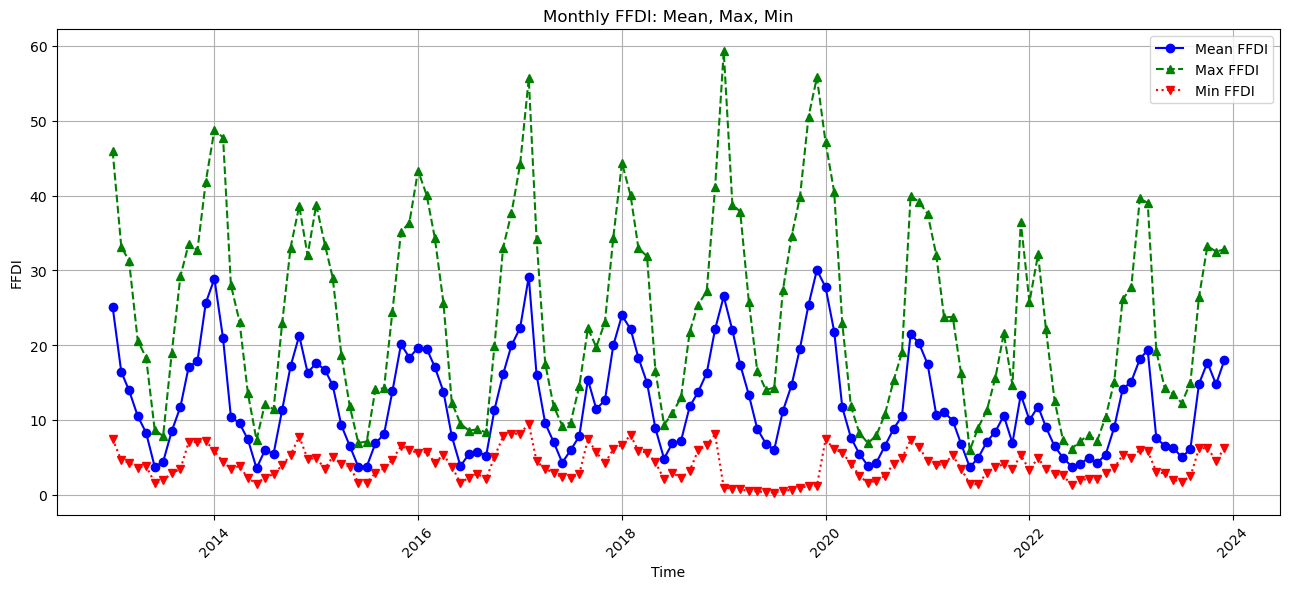

In [41]:
import os
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# === Folder with FFDI rasters ===
ffdi_folder = r"C:/Users/gades/Desktop/Thesis/datasets/terra_var/FFDI_final"

# === Time series containers ===
dates = []
mean_ffdi = []
max_ffdi = []
min_ffdi = []

# === Process each file ===
for fname in sorted(os.listdir(ffdi_folder)):
    if fname.endswith(".tif") and fname.startswith("ffdi_"):
        try:
            # Parse date from filename
            date_str = fname.replace("ffdi_", "").replace(".tif", "")
            date = datetime.strptime(date_str, "%Y-%m")

            with rasterio.open(os.path.join(ffdi_folder, fname)) as src:
                arr = src.read(1).astype(np.float32)
                arr[arr == src.nodata] = np.nan

                mean_val = np.nanmean(arr)
                max_val = np.nanmax(arr)
                min_val = np.nanmin(arr)

            dates.append(date)
            mean_ffdi.append(mean_val)
            max_ffdi.append(max_val)
            min_ffdi.append(min_val)

        except Exception as e:
            print(f"⚠️ Skipped {fname}: {e}")

# === Plot ===
plt.figure(figsize=(13, 6))
plt.plot(dates, mean_ffdi, label="Mean FFDI", color='blue', marker='o')
plt.plot(dates, max_ffdi, label="Max FFDI", color='green', linestyle='--', marker='^')
plt.plot(dates, min_ffdi, label="Min FFDI", color='red', linestyle=':', marker='v')

plt.xlabel("Time")
plt.ylabel("FFDI")
plt.title("Monthly FFDI: Mean, Max, Min")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Section: Compute Alternative FFDI Dataset (Minimum DF Variant)

In [50]:
import os
import numpy as np
import rasterio
from rasterio.warp import reproject, Resampling

# === Input Folders ===
t_folder = r"C:/Users/gades/Desktop/Thesis/datasets/terra_var/tmax_monthly"
rh_folder = r"C:/Users/gades/Desktop/Thesis/datasets/terra_var/relative_humidity"
v_folder = r"C:/Users/gades/Desktop/Thesis/datasets/terra_var/ws_kmph_clipped"
df_folder = r"C:/Users/gades/Desktop/Thesis/datasets/terra_var/min"
out_folder = r"C:/Users/gades/Desktop/Thesis/datasets/terra_var/FFDI_final4"
os.makedirs(out_folder, exist_ok=True)

# === FFDI Formula ===
def compute_ffdi(t, rh, v, df):
    with np.errstate(divide='ignore', invalid='ignore'):
        df_safe = np.where(df <= 0, np.nan, df)
        ln_df = np.log(df_safe)
        ffdi = 2 * np.exp(-0.45 + 0.98 * ln_df - 0.0345 * rh + 0.0338 * t + 0.0234 * v)
    return ffdi

# === Resample function ===
def resample_to_match(src_data, src_transform, src_crs, dst_shape, dst_transform, dst_crs):
    dst_data = np.empty(dst_shape, dtype=np.float32)
    reproject(
        source=src_data,
        destination=dst_data,
        src_transform=src_transform,
        src_crs=src_crs,
        dst_transform=dst_transform,
        dst_crs=dst_crs,
        resampling=Resampling.bilinear
    )
    return dst_data

# === Loop through tmax files ===
for fname in sorted(os.listdir(t_folder)):
    if fname.endswith(".tif") and fname.startswith("tmax_"):
        date_tag = fname.replace("tmax_", "").replace(".tif", "")
        df_tag = date_tag.replace("-", "_")

        try:
            # Open tmax as reference
            with rasterio.open(os.path.join(t_folder, fname)) as t_src:
                t = t_src.read(1).astype(np.float32)
                t[t == t_src.nodata] = np.nan
                ref_shape = t.shape
                ref_transform = t_src.transform
                ref_crs = t_src.crs
                profile = t_src.profile

            # Load and resample RH
            with rasterio.open(os.path.join(rh_folder, f"rh_{date_tag}.tif")) as rh_src:
                rh_raw = rh_src.read(1).astype(np.float32)
                rh_raw[rh_raw == rh_src.nodata] = np.nan
                rh = resample_to_match(rh_raw, rh_src.transform, rh_src.crs, ref_shape, ref_transform, ref_crs)

            # Load and resample WS
            with rasterio.open(os.path.join(v_folder, f"ws_{date_tag}.tif")) as v_src:
                v_raw = v_src.read(1).astype(np.float32)
                v_raw[v_raw == v_src.nodata] = np.nan
                v = resample_to_match(v_raw, v_src.transform, v_src.crs, ref_shape, ref_transform, ref_crs)

            # Load and resample DF
            with rasterio.open(os.path.join(df_folder, f"min_{df_tag}.tif")) as df_src:
                df_raw = df_src.read(1).astype(np.float32)
                df_raw[df_raw == df_src.nodata] = np.nan
                df = resample_to_match(df_raw, df_src.transform, df_src.crs, ref_shape, ref_transform, ref_crs)

            # Compute FFDI
            ffdi = compute_ffdi(t, rh, v, df)

            # Save output
            profile.update(dtype='float32', nodata=np.nan)
            out_path = os.path.join(out_folder, f"ffdi_{date_tag}.tif")
            with rasterio.open(out_path, 'w', **profile) as dst:
                dst.write(ffdi.astype(np.float32), 1)

            print(f"✅ FFDI saved: {out_path}")

        except Exception as e:
            print(f"❌ Error for {fname}: {e}")


✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/FFDI_final4\ffdi_2013-01.tif
✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/FFDI_final4\ffdi_2013-02.tif
✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/FFDI_final4\ffdi_2013-03.tif
✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/FFDI_final4\ffdi_2013-04.tif
✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/FFDI_final4\ffdi_2013-05.tif
✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/FFDI_final4\ffdi_2013-06.tif
✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/FFDI_final4\ffdi_2013-07.tif
✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/FFDI_final4\ffdi_2013-08.tif
✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/FFDI_final4\ffdi_2013-09.tif
✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/FFDI_final4\ffdi_2013-10.tif
✅ FFDI saved: C:/Users/gades/Desktop/Thesis/datasets/terra_var/FFDI_final4\ffdi_

## Section: Compare Multiple FFDI Datasets Across Methods

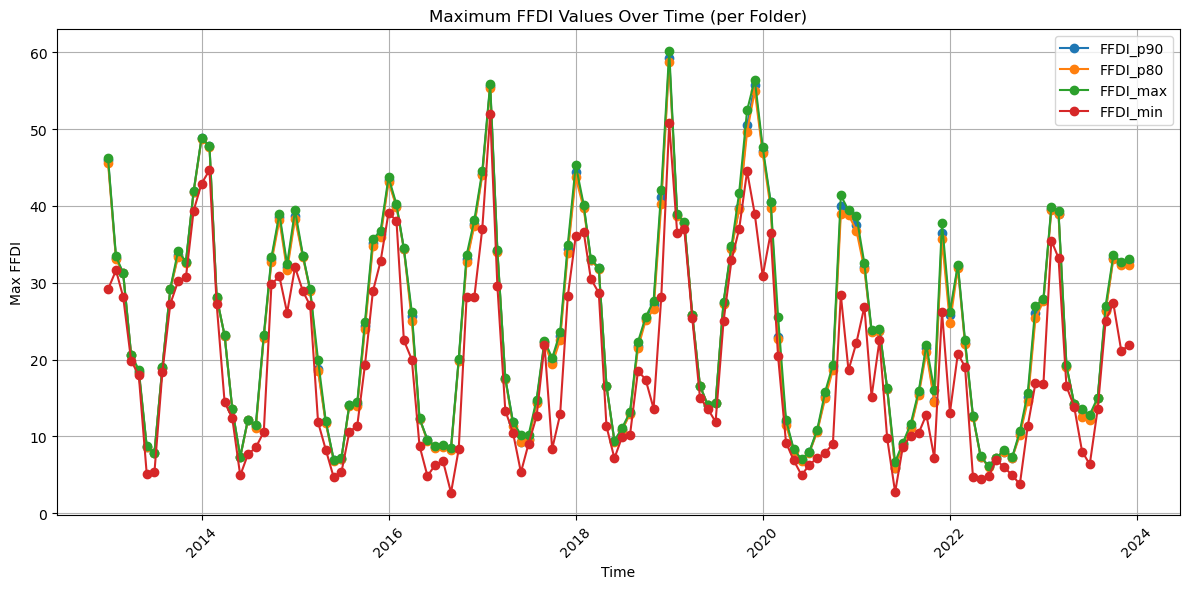

In [52]:
import os
import numpy as np
import rasterio
import matplotlib.pyplot as plt
from datetime import datetime

# === Folders containing FFDI rasters ===
folders = {
    "FFDI_p90": r"C:/Users/gades/Desktop/Thesis/datasets/terra_var/FFDI_final",
    "FFDI_p80": r"C:/Users/gades/Desktop/Thesis/datasets/terra_var/FFDI_final2",
    "FFDI_max": r"C:/Users/gades/Desktop/Thesis/datasets/terra_var/FFDI_final3",
    "FFDI_min": r"C:/Users/gades/Desktop/Thesis/datasets/terra_var/FFDI_final4",
}

# === Initialize results ===
results = {}

# === Loop through each folder ===
for label, folder_path in folders.items():
    max_vals = []
    dates = []

    if not os.path.exists(folder_path):
        print(f"❌ Folder not found: {folder_path}")
        continue

    for fname in sorted(os.listdir(folder_path)):
        if fname.endswith(".tif") and fname.startswith("ffdi_"):
            try:
                date_str = fname.replace("ffdi_", "").replace(".tif", "")
                date = datetime.strptime(date_str, "%Y-%m")

                with rasterio.open(os.path.join(folder_path, fname)) as src:
                    arr = src.read(1).astype(np.float32)
                    arr[arr == src.nodata] = np.nan
                    max_val = np.nanmax(arr)

                dates.append(date)
                max_vals.append(max_val)

            except Exception as e:
                print(f"⚠️ Skipped {fname} in {label}: {e}")

    results[label] = {"dates": dates, "max_vals": max_vals}

# === Plot ===
plt.figure(figsize=(12, 6))
for label, data in results.items():
    plt.plot(data["dates"], data["max_vals"], label=label, marker='o')

plt.xlabel("Time")
plt.ylabel("Max FFDI")
plt.title("Maximum FFDI Values Over Time (per Folder)")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
